In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style(style="darkgrid")

In [25]:
a = 8
b = "ahmed"


In [3]:
from statsmodels.datasets.utils import Dataset


beauty: Dataset = sm.datasets.get_rdataset(dataname="TeachingRatings", package="AER")
print(beauty.__doc__)

.. container::

   .. container::

      =============== ===============
      TeachingRatings R Documentation
      =============== ===============

      .. rubric:: Impact of Beauty on Instructor's Teaching Ratings
         :name: impact-of-beauty-on-instructors-teaching-ratings

      .. rubric:: Description
         :name: description

      Data on course evaluations, course characteristics, and professor
      characteristics for 463 courses for the academic years 2000–2002
      at the University of Texas at Austin.

      .. rubric:: Usage
         :name: usage

      .. code:: R

         data("TeachingRatings")

      .. rubric:: Format
         :name: format

      A data frame containing 463 observations on 13 variables.

      minority
         factor. Does the instructor belong to a minority
         (non-Caucasian)?

      age
         the professor's age.

      gender
         factor indicating instructor's gender.

      credits
         factor. Is the course a singl

In [4]:
import os

file_path: str = os.getcwd()
file_name = "TeachingRatings_DataSet.txt"
data: str = os.path.join(file_path, file_name)

with open(file=data, mode="w") as file:
    file.write(beauty.__doc__)


In [5]:
df = pd.DataFrame(data=beauty.data)
df

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1
1,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2
2,no,51,male,more,-0.571984,3.7,upper,yes,yes,55,55,3
3,no,40,female,more,-0.677963,4.3,upper,yes,yes,40,46,4
4,no,31,female,more,1.509794,4.4,upper,yes,yes,42,48,5
...,...,...,...,...,...,...,...,...,...,...,...,...
458,no,32,male,more,1.231394,3.2,lower,yes,yes,9,21,93
459,no,32,male,more,1.231394,4.3,upper,yes,yes,52,86,93
460,yes,42,female,more,0.420400,3.3,upper,no,yes,52,67,94
461,yes,42,female,more,0.420400,3.2,upper,no,yes,54,66,94


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   minority     463 non-null    object 
 1   age          463 non-null    int64  
 2   gender       463 non-null    object 
 3   credits      463 non-null    object 
 4   beauty       463 non-null    float64
 5   eval         463 non-null    float64
 6   division     463 non-null    object 
 7   native       463 non-null    object 
 8   tenure       463 non-null    object 
 9   students     463 non-null    int64  
 10  allstudents  463 non-null    int64  
 11  prof         463 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 43.5+ KB


In [7]:
np.round(a=df.describe(), decimals=3)

,age,beauty,eval,students,allstudents,prof
count,463.000,463.000,463.000,463.000,463.000,463.000
mean,48.365,0.000,3.998,36.624,55.177,45.434
std,9.803,0.789,0.555,45.018,75.073,27.509
min,29.000,-1.450,2.100,5.000,8.000,1.000
25%,42.000,-0.656,3.600,15.000,19.000,20.000
50%,48.000,-0.068,4.000,23.000,29.000,44.000
75%,57.000,0.546,4.400,40.000,60.000,70.500
max,73.000,1.970,5.000,380.000,581.000,94.000


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'beauty'}>],
       [<Axes: title={'center': 'eval'}>,
        <Axes: title={'center': 'students'}>],
       [<Axes: title={'center': 'allstudents'}>,
        <Axes: title={'center': 'prof'}>]], dtype=object)

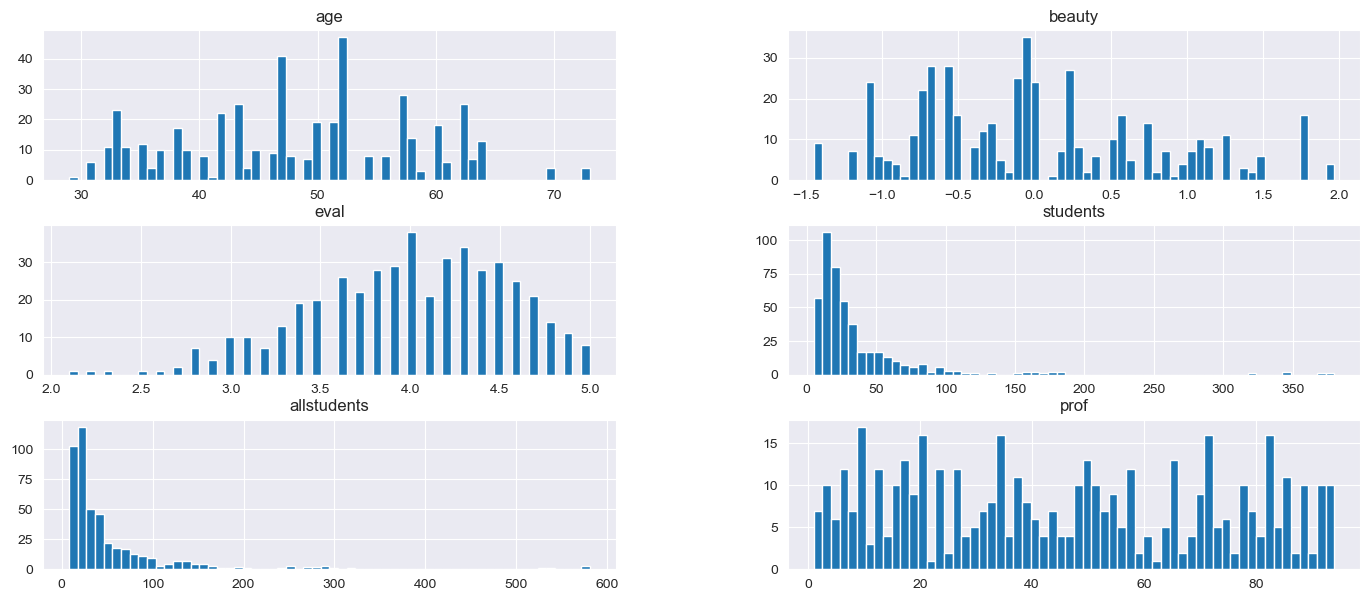

In [8]:
df.hist(figsize=(17,7), bins=60)

In [9]:
df

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1
1,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2
2,no,51,male,more,-0.571984,3.7,upper,yes,yes,55,55,3
3,no,40,female,more,-0.677963,4.3,upper,yes,yes,40,46,4
4,no,31,female,more,1.509794,4.4,upper,yes,yes,42,48,5
...,...,...,...,...,...,...,...,...,...,...,...,...
458,no,32,male,more,1.231394,3.2,lower,yes,yes,9,21,93
459,no,32,male,more,1.231394,4.3,upper,yes,yes,52,86,93
460,yes,42,female,more,0.420400,3.3,upper,no,yes,52,67,94
461,yes,42,female,more,0.420400,3.2,upper,no,yes,54,66,94


In [10]:
from pandas import DataFrame


gender: DataFrame = pd.get_dummies(data=df["gender"]).astype(dtype=np.int32)
gender

,female,male
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
458,0,1
459,0,1
460,1,0
461,1,0


In [11]:
pd.concat(objs=[df.iloc[:,:3],gender,df.iloc[:,3:]], axis=1)

,minority,age,gender,female,male,credits,beauty,eval,division,native,tenure,students,allstudents,prof
0,yes,36,female,1,0,more,0.289916,4.3,upper,yes,yes,24,43,1
1,no,59,male,0,1,more,-0.737732,4.5,upper,yes,yes,17,20,2
2,no,51,male,0,1,more,-0.571984,3.7,upper,yes,yes,55,55,3
3,no,40,female,1,0,more,-0.677963,4.3,upper,yes,yes,40,46,4
4,no,31,female,1,0,more,1.509794,4.4,upper,yes,yes,42,48,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,no,32,male,0,1,more,1.231394,3.2,lower,yes,yes,9,21,93
459,no,32,male,0,1,more,1.231394,4.3,upper,yes,yes,52,86,93
460,yes,42,female,1,0,more,0.420400,3.3,upper,no,yes,52,67,94
461,yes,42,female,1,0,more,0.420400,3.2,upper,no,yes,54,66,94


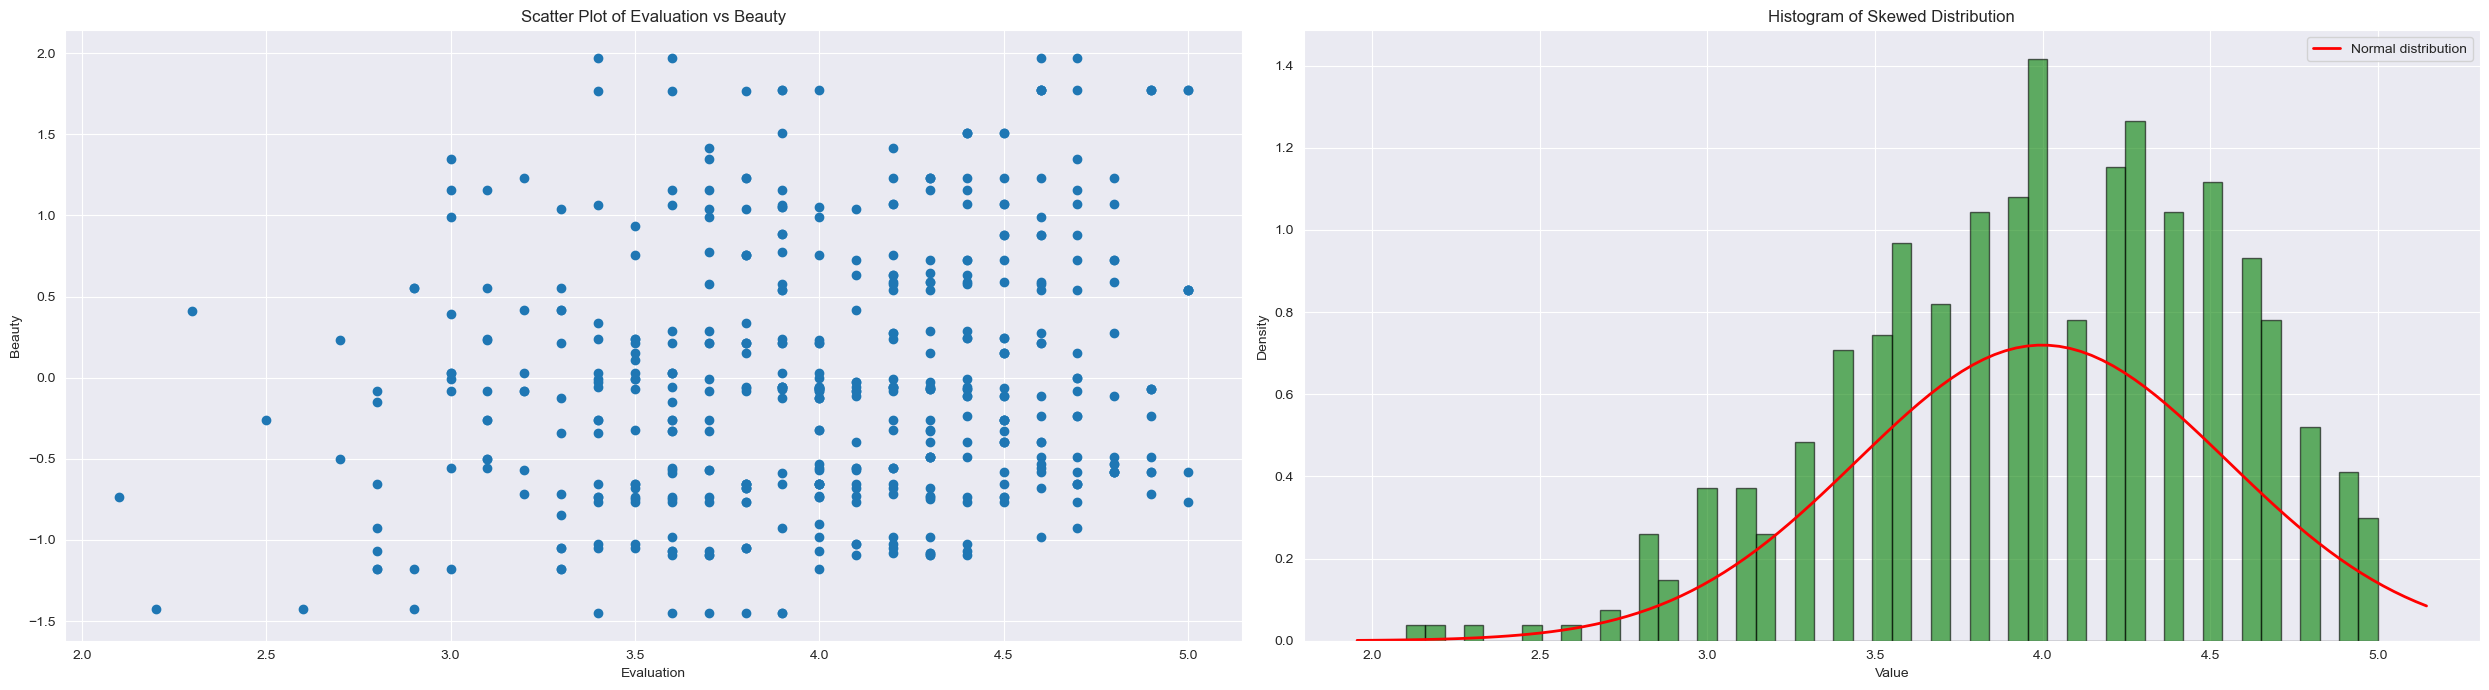

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 beauty   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     17.08
Date:                Sun, 25 Aug 2024   Prob (F-statistic):           4.25e-05
Time:                        19:06:59   Log-Likelihood:                -538.11
No. Observations:                 463   AIC:                             1080.
Df Residuals:                     461   BIC:                             1088.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0743      0.262     -4.094      0.000      -1.590      -0.559
eval           0.2687      0.065      4.133      0.000       0.141       0.396
==============================================================================
Omnibus:                       25.836   Durbin-Watson:                   0.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.678
Skew:                           0.512   Prob(JB):                     4.38e-06
Kurtosis:                       2.518   Cond. No.                         31.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
from typing import Any
from numpy import dtype, floating, ndarray
from statsmodels.regression.linear_model import RegressionResultsWrapper
from pandas import Series

y: Series = df["beauty"]
x1: Series = df["eval"]

# Calculate the mean and standard deviation
mean_x1: floating[Any] = np.mean(a=x1)
std_x1: floating[Any] = np.std(a=x1)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2 , figsize=(25,7))
ax1.scatter(x=x1, y=y)
ax1.set_xlabel("Evaluation")
ax1.set_ylabel("Beauty")
ax1.set_title("Scatter Plot of Evaluation vs Beauty")

# Histogram on ax2
ax2.hist(x1, bins=50, density=True, alpha=0.6, color='g', edgecolor='black')

# Plot the corresponding normal distribution for comparison on ax2
xmin, xmax = ax2.get_xlim()
x = np.linspace(xmin, xmax, 100)
p: ndarray[Any, dtype[Any]] = stats.norm.pdf(x, mean_x1, std_x1)
ax2.plot(x, p, 'r', lw=2, label='Normal distribution')

ax2.set_title('Histogram of Skewed Distribution')
ax2.set_xlabel('Value')
ax2.set_ylabel('Density')
ax2.legend()

plt.tight_layout()
plt.show()

x = sm.add_constant(data=x1)
result: RegressionResultsWrapper = sm.OLS(endog=y, exog=x).fit()
result.summary()

## plot a regression line 

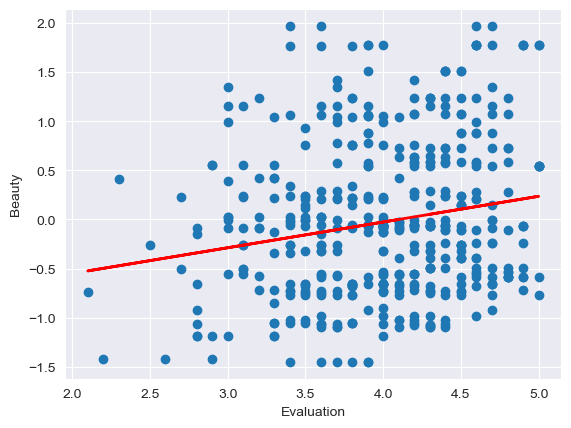

In [13]:
from matplotlib.lines import Line2D


plt.scatter(x=x1, y=y)
plt.xlabel(xlabel="Evaluation")
plt.ylabel(ylabel="Beauty")

y_hat = 0.262 * x1 - 1.0743
fig: list[Line2D] = plt.plot(x1, y_hat, lw=2, color="red", label="Regression")

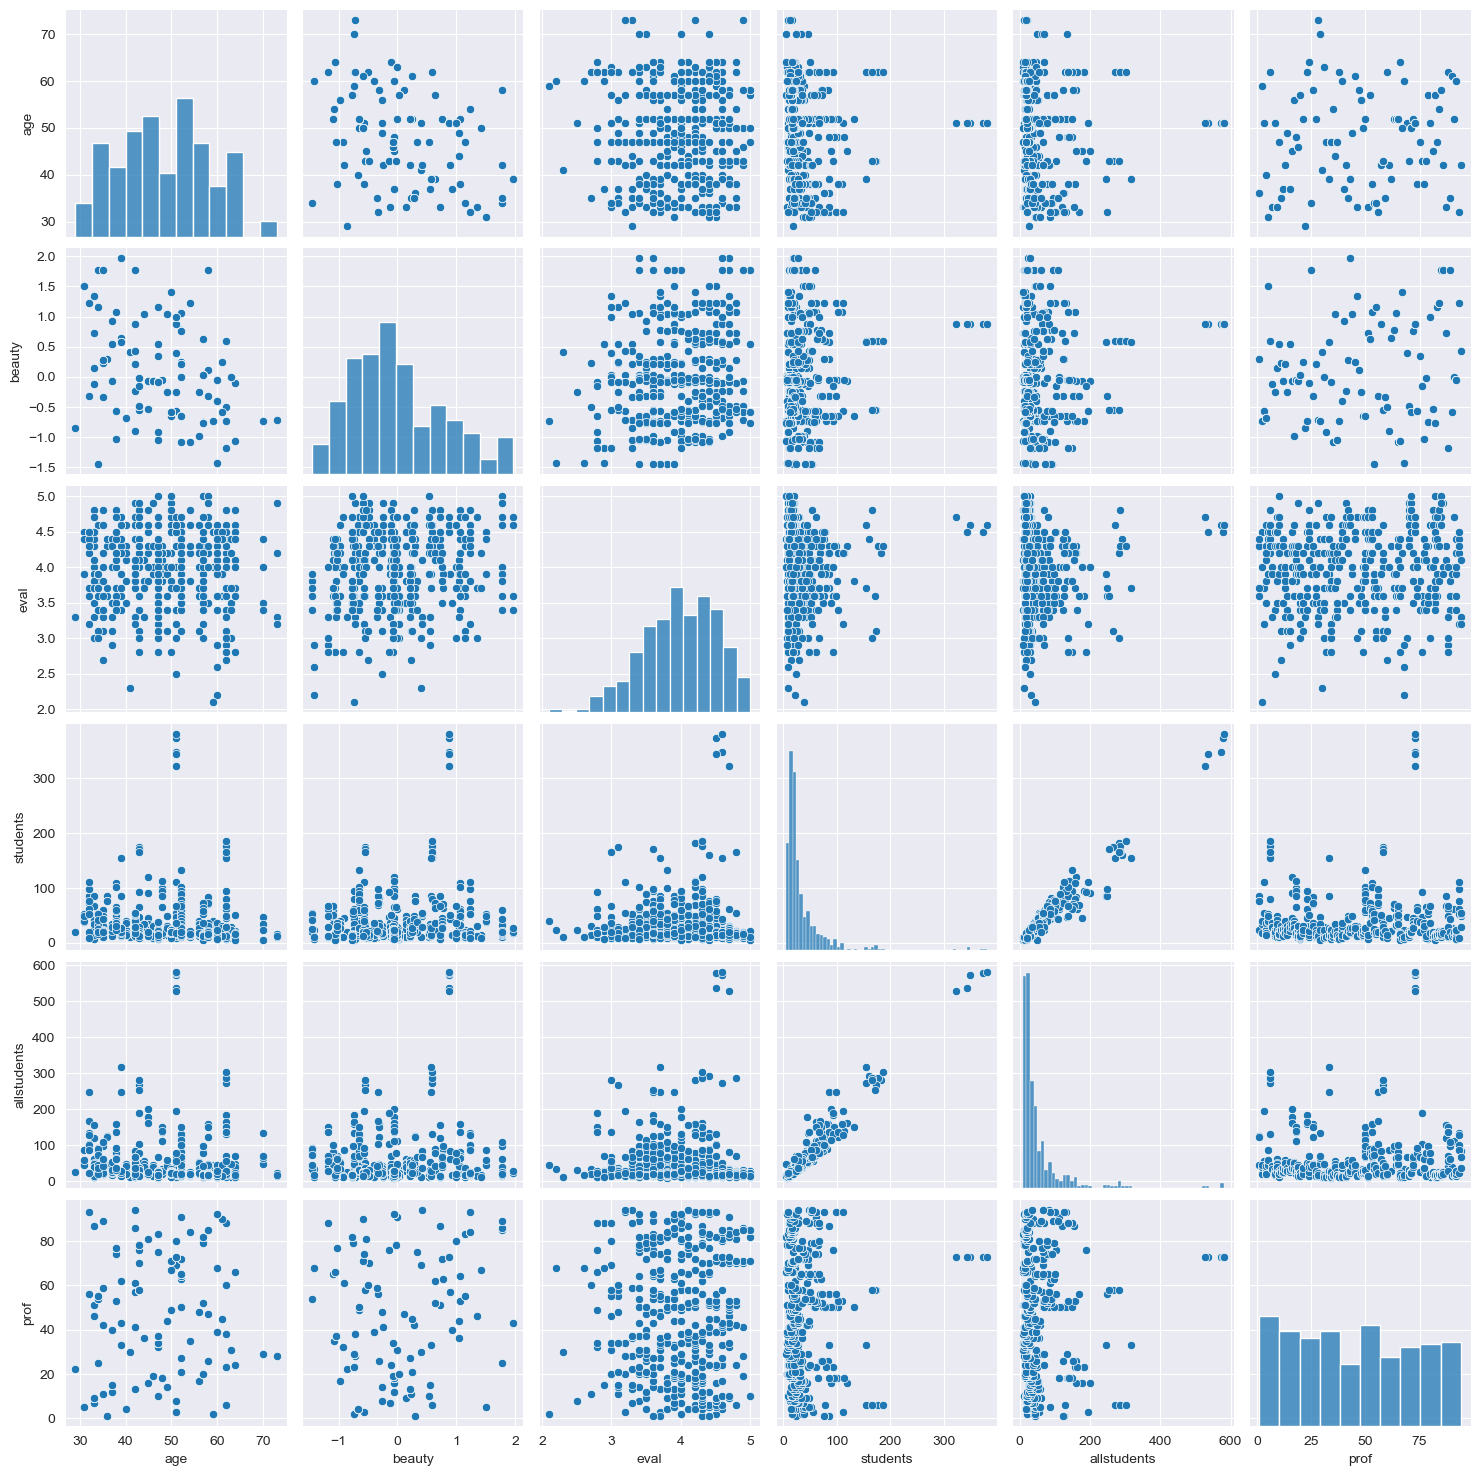

In [14]:
sns.pairplot(data=df)

<Axes: xlabel='eval', ylabel='beauty'>

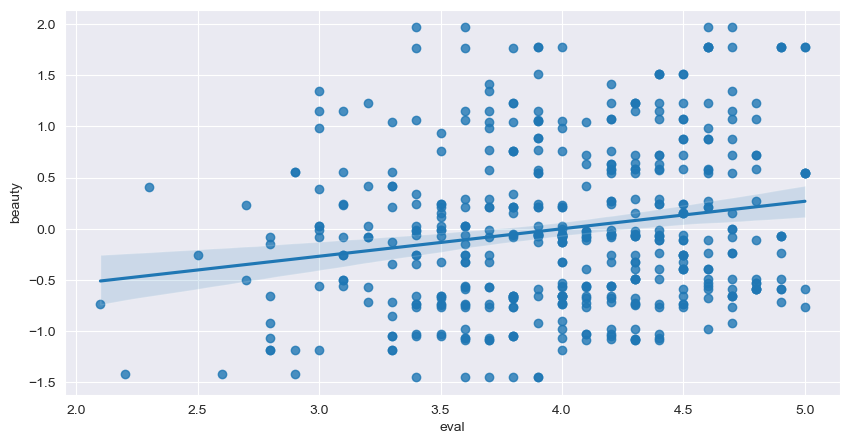

In [15]:
plt.figure(figsize=(10,5))
sns.regplot(x=x1, y=y)

In [16]:
from pandas.core.frame import DataFrame


tips: DataFrame = sns.load_dataset(name="tips")
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [17]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [18]:
tips["size"].value_counts()

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64

In [19]:
tips[tips["size"] >= 4]

,total_bill,tip,sex,smoker,day,time,size
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
7,26.88,3.12,Male,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4
13,18.43,3.00,Male,No,Sun,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
25,17.81,2.34,Male,No,Sat,Dinner,4
31,18.35,2.50,Male,No,Sat,Dinner,4
33,20.69,2.45,Female,No,Sat,Dinner,4
44,30.40,5.60,Male,No,Sun,Dinner,4


In [20]:
tips["tip"].sort_values(ascending=False)
tips[tips["tip"] >= 7]

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4


In [21]:
x1 = tips["total_bill"]
y = tips["tip"]

x = sm.add_constant(data=x1)
result = sm.OLS(endog=y, exog=x).fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sun, 25 Aug 2024   Prob (F-statistic):           6.69e-34
Time:                        19:07:09   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='total_bill', ylabel='tip'>

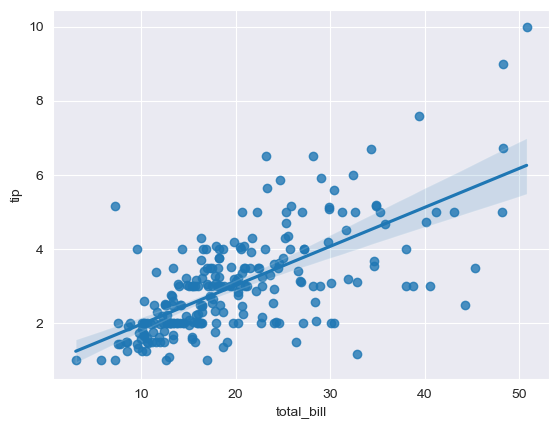

In [22]:
sns.regplot(x=x1, y=y)

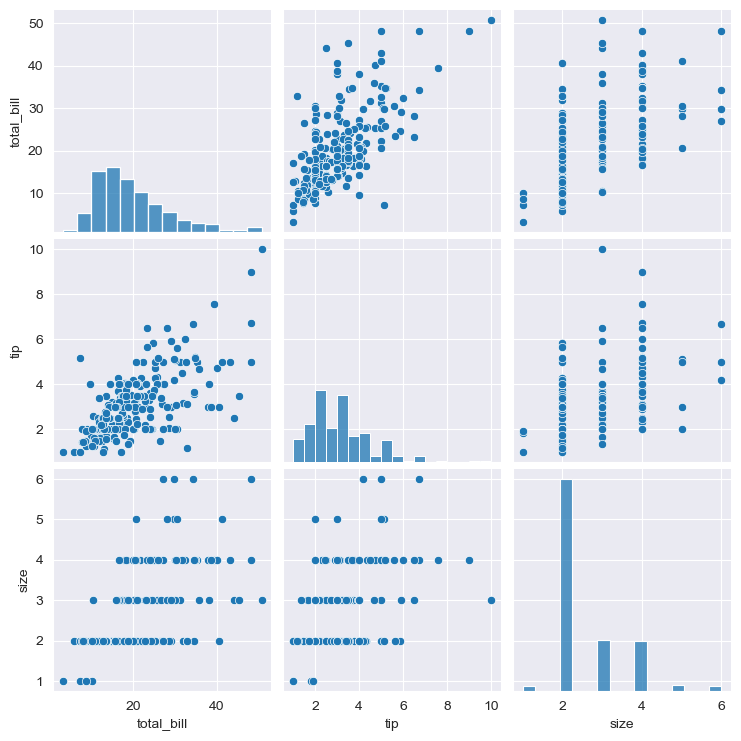

In [23]:
sns.pairplot(data=tips)

In [24]:
gender_dummy = pd.get_dummies(data=tips["sex"]).astype(dtype=np.int64)
y = gender_dummy["Female"]
x1 = tips["tip"]

x = sm.add_constant(data=x1)
result = sm.OLS(endog=y, exog=x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Female   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.926
Date:                Sun, 25 Aug 2024   Prob (F-statistic):              0.166
Time:                        19:07:12   Log-Likelihood:                -165.65
No. Observations:                 244   AIC:                             335.3
Df Residuals:                     242   BIC:                             342.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4490      0.073      6.124      0.000       0.305       0.593
tip           -0.0308      0.022     -1.388      0.166      -0.075       0.013
==============================================================================
Omnibus:                     2018.669   Durbin-Watson:                   1.770
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.843
Skew:                           0.588   Prob(JB):                     1.35e-09
Kurtosis:                       1.376   Cond. No.                         8.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""